In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


# 리눅스 명령어를 활용하여 압축 해제
- Jupyter Notebook(코랩)에서 리눅스 명렁어 수행 : 코드 앞쪽에 %, ! 를 입력하고 작성

# 현재 경로 확인
%pwd

In [17]:
%pwd

'/content'

# 경로 변경
%cd 디렉토리경로

In [18]:
%cd /content/drive/MyDrive/멀티캠퍼스 9회차 I반/09 CNN convolutional nuaral network

/content/drive/MyDrive/멀티캠퍼스 9회차 I반/09 CNN convolutional nuaral network


In [19]:
%pwd

'/content/drive/MyDrive/멀티캠퍼스 9회차 I반/09 CNN convolutional nuaral network'

# ZIP파일 압축 풀기
!unzip [압축파일 위치] -d [압축 풀 위치]

In [6]:
# !unzip ./data/training_set.zip -d ./data/cat-and-dog
# ./는 현재 위치

In [7]:
# !unzip ./data/test_set.zip -d ./data/cat-and-dog

# 파일 경로 파악
os.walk : 디렉토리 탐색

In [20]:
for dirname, _, filenames in os.walk("./data"): # 경로, 폴더, 파일
  for filename in filenames[:3]:
    print(os.path.join(dirname,filename))

./data/test_set.zip
./data/training_set.zip
./data/cat-and-dog/test_set/dogs/dog.4603.jpg
./data/cat-and-dog/test_set/dogs/dog.4171.jpg
./data/cat-and-dog/test_set/dogs/dog.4165.jpg
./data/cat-and-dog/test_set/cats/cat.4157.jpg
./data/cat-and-dog/test_set/cats/cat.4802.jpg
./data/cat-and-dog/test_set/cats/cat.4180.jpg
./data/cat-and-dog/training_set/dogs/dog.3664.jpg
./data/cat-and-dog/training_set/dogs/dog.2234.jpg
./data/cat-and-dog/training_set/dogs/dog.754.jpg
./data/cat-and-dog/training_set/cats/cat.3631.jpg
./data/cat-and-dog/training_set/cats/cat.998.jpg
./data/cat-and-dog/training_set/cats/cat.3625.jpg


# 이미지 메타데이터 수집
- 파일 경로, 학습/테스트 여부, label값(강아지 , 고양이)

In [21]:
image_paths = [] # 파일 경로
dataset_gubuns = [] # 훈련/테스트
label_gubuns = [] # 강아지/고양이

for dirname, _, filenames in os.walk("./data/cat-and-dog"):
  for filename in filenames:
    # 사진 파일만 추가
    if ".jpg" in filename:
      
      # 1. 파일의 경로 만들기

      ## 절대경로 예시 (첨부터 끝까지 다있는 경로)
      # Windows : C:\data\training_set\cats\cat.jpg
      # Mac : /home/사용자명/data/training_set/cats/cat.jpg
      # Linux : /home/사용자명/data/training_set/cats/cat.jpg

      ## 상대경로 예시 (내가있는곳부터 치는경로)
      # ./data/training_set/cats/cat.jpg

      # 절대 경로 : os.path.abspath 를 사용하면 절대경로로 써줄수있음
      file_path = os.path.join(dirname, filename) # 상대 경로 만들기. 내가 위에서cd로 현재위치 옮겨놔서
      image_paths.append(file_path)

      # 2. train/test 여부 판단
      if "/training_set/" in file_path:
        dataset_gubuns.append("train")
      elif "/test_set/" in file_path:
        dataset_gubuns.append("test")
      else:
        dataset_gubuns.append("na")

      # 3. 경로에 dogs가 있으면 dog, cats가 있으면 cat -> 클래스 지정
      if "dogs" in file_path:
        label_gubuns.append("DOG")
      elif "cats" in file_path:
        label_gubuns.append("CAT")
      else:
        label_gubuns.append("na")

In [22]:
image_paths[:3], dataset_gubuns[:3], label_gubuns[:3]

(['./data/cat-and-dog/test_set/dogs/dog.4603.jpg',
  './data/cat-and-dog/test_set/dogs/dog.4171.jpg',
  './data/cat-and-dog/test_set/dogs/dog.4165.jpg'],
 ['test', 'test', 'test'],
 ['DOG', 'DOG', 'DOG'])

# 수집한 메터데이터를 DATAFrame으로 만들어서 확인

In [23]:
# 데이터 프레임의 가로 전체를 볼 수 있도록설정 짤릴까봐
pd.set_option("display.max_colwidth", 200)


df_meta = pd.DataFrame({
    "path": image_paths,
    "dataset": dataset_gubuns,
    "label": label_gubuns
})

df_meta

,path,dataset,label
0,./data/cat-and-dog/test_set/dogs/dog.4603.jpg,test,DOG
1,./data/cat-and-dog/test_set/dogs/dog.4171.jpg,test,DOG
2,./data/cat-and-dog/test_set/dogs/dog.4165.jpg,test,DOG
3,./data/cat-and-dog/test_set/dogs/dog.4429.jpg,test,DOG
4,./data/cat-and-dog/test_set/dogs/dog.4159.jpg,test,DOG
...,...,...,...
10023,./data/cat-and-dog/training_set/cats/cat.2579.jpg,train,CAT
10024,./data/cat-and-dog/training_set/cats/cat.3667.jpg,train,CAT
10025,./data/cat-and-dog/training_set/cats/cat.1064.jpg,train,CAT
10026,./data/cat-and-dog/training_set/cats/cat.3101.jpg,train,CAT


In [24]:
len(image_paths), len(dataset_gubuns), len(label_gubuns)

(10028, 10028, 10028)

In [25]:
df_meta['dataset'].value_counts()

train    8005
test     2023
Name: dataset, dtype: int64

In [26]:
df_meta['label'].value_counts()

DOG    5017
CAT    5011
Name: label, dtype: int64

# 이미지 시각화

In [27]:
import matplotlib.pyplot as plt
import cv2

def show_grid_images(image_path_list, ncols=8, title=None ):
  figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)

  for i in range(ncols):
    image = cv2.imread(image_path_list[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].set_title(title)
    
dog_image_list = df_meta[ df_meta['label'] == 'DOG' ]['path'].iloc[:6].tolist()
cat_image_list = df_meta[ df_meta['label'] == 'CAT' ]['path'].iloc[:6].tolist()

print(dog_image_list)
print(cat_image_list)

['./data/cat-and-dog/test_set/dogs/dog.4603.jpg', './data/cat-and-dog/test_set/dogs/dog.4171.jpg', './data/cat-and-dog/test_set/dogs/dog.4165.jpg', './data/cat-and-dog/test_set/dogs/dog.4429.jpg', './data/cat-and-dog/test_set/dogs/dog.4159.jpg', './data/cat-and-dog/test_set/dogs/dog.4617.jpg']
['./data/cat-and-dog/test_set/cats/cat.4157.jpg', './data/cat-and-dog/test_set/cats/cat.4802.jpg', './data/cat-and-dog/test_set/cats/cat.4180.jpg', './data/cat-and-dog/test_set/cats/cat.4194.jpg', './data/cat-and-dog/test_set/cats/cat.4976.jpg', './data/cat-and-dog/test_set/cats/cat.4745.jpg']


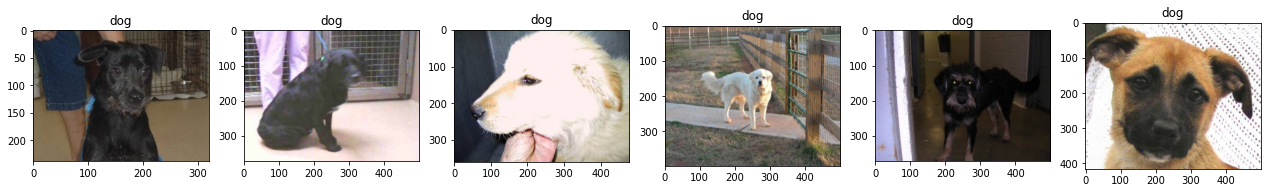

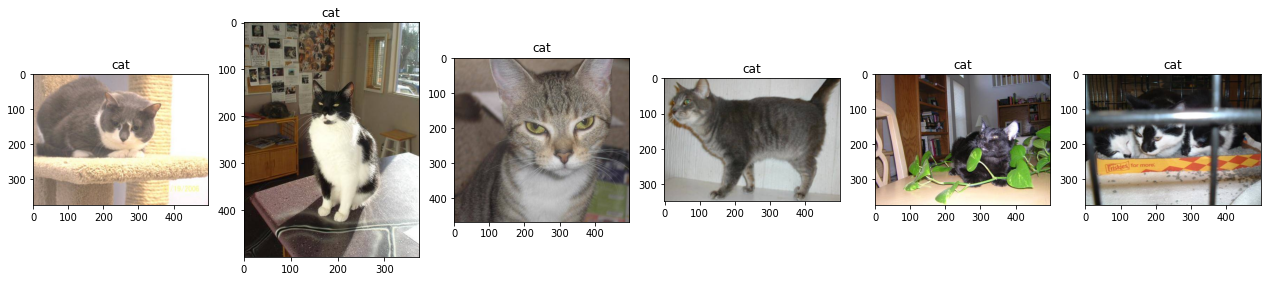

In [28]:
show_grid_images(dog_image_list, 6, title="dog")
show_grid_images(cat_image_list, 6, title="cat")

# ImageDataGenerator로 이미지 불러오기
1. 설정
2. 이미지를 올려서(`fit()`) Augmentation을 할 수 있도록 통과(`flow()`)
  * 이 과정에서 Augmentation이 되는 것이 아니다!
  * 장전시킨거일뿐 next해야 증강일어난다
  * 모델의 훈련과정에서 Augmentation이 일어난다.

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 객체 생성
train_gen = ImageDataGenerator(
    # Augmentation 계획
    horizontal_flip=True, 
    rotation_range=45,

    # Rescale
    rescale= 1 / 255.0 # 모든 픽셀을 0 ~ 1 사이로 만들기
)

Augmentation 계획은 너무 많으면 안된다. 과대적합의 위험성이 항상 있다.

## flow, flow_from_directory, flow_from_dataframe
- ImageDataGenerator에 의해 이미지가 메모리에 적재되는 과정
- `flow` : opencv나 pil 등을 이용해 이미 numpy array가 된 이미지를 적재
- `flow_from_directory` : 지정한 경로에 있는 배치 크기 만큼의 이미지를 불러와서 적재
- `flow_from_dataframe` : 이미지의 메타데이터 정보를 이용해서 배치 크기 만큼의 이미지를 불러와서 적재 ⭐⭐⭐⭐⭐

`flow_from_directory`, `flow_from_dataframe`을 사용할 때 `Label` 형식도 지정이 가능
* `class_mode='categorical'` : One Hot Encoding된 형태
* `class_mode='sparse'` : LabelEncoding된 형태
* `class_mode='binary'` : 0 / 1로 인코딩
  * 출력층 뉴런의 개수가 1개이고, 활성화 함수가 `sigmoid` 함수일 때만 사용한다.
  * 클래스가 3개 이상일 때는 사용 불가!

## flow_from_directory
- 경로지정해줘야해서 좀귀차늠

In [30]:
train_flow_gen = train_gen.flow_from_directory(
    directory = "./data/cat-and-dog/training_set",
    # 이미지 크기가 제각각이라 통일해주기
    target_size=(224,224),

    # 레이블형식 flow_from_directory는 폴더의개수가 클래스의 개수가됨
    class_mode='categorical',

    batch_size=64

)

# 폴더가 2개니까 클래스도 2개로나왔음!

Found 8005 images belonging to 2 classes.


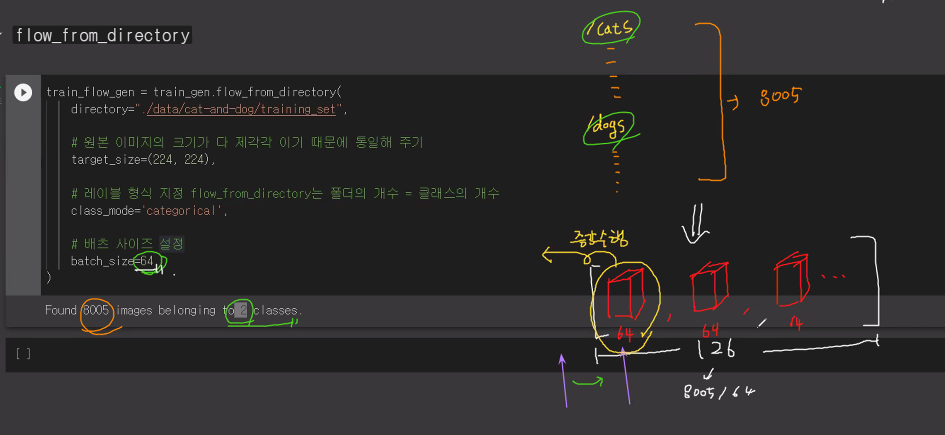

# next()함수를 통해  iteration을 수행

In [31]:
# 증강이 여기서 적용⭐
# 배치 사이즈인 64개씩 이미지와 레이블(위에서 클래스가2개였으니까)을 가져온다. (장전)

image_batch, label_batch = next(train_flow_gen)
image_batch.shape, label_batch.shape 

((64, 224, 224, 3), (64, 2))

# `flow_from_dataframe`
* 실무자 입장에서 굉장히 **권장**하는 방식
* `flow_from_directroy`는 데이터의 로딩을 폴더에 직접 접근해서 로딩
  - 코딩을 통해서 예외를 직접 처리 해야 한다.
    - ex)강아지 고양이만 불러오고싶은데 강아지 고양이 말폴더가있었다.? 직접걸러줘야함
* `flow_from_dataframe`은 데이터의 로딩을 데이터 프레임을 토대로 로딩
  - 간단한 조건 연산만 있으면 개발자가 충분히 데이터를 걸러낼 수가 있다.
  - 실수가 많이 줄어들 수 있다.

# test, validation은 증강할필요가없다. rescaling까지는 허용
증강을 하는 이유는 훈련을 더 잘할수있도록 데이터의 복잡성을 높여주는거기때문

In [32]:
df_meta

,path,dataset,label
0,./data/cat-and-dog/test_set/dogs/dog.4603.jpg,test,DOG
1,./data/cat-and-dog/test_set/dogs/dog.4171.jpg,test,DOG
2,./data/cat-and-dog/test_set/dogs/dog.4165.jpg,test,DOG
3,./data/cat-and-dog/test_set/dogs/dog.4429.jpg,test,DOG
4,./data/cat-and-dog/test_set/dogs/dog.4159.jpg,test,DOG
...,...,...,...
10023,./data/cat-and-dog/training_set/cats/cat.2579.jpg,train,CAT
10024,./data/cat-and-dog/training_set/cats/cat.3667.jpg,train,CAT
10025,./data/cat-and-dog/training_set/cats/cat.1064.jpg,train,CAT
10026,./data/cat-and-dog/training_set/cats/cat.3101.jpg,train,CAT


In [33]:
df_train = df_meta[df_meta['dataset']=='train']
df_test = df_meta[df_meta['dataset']=='test']

In [34]:
df_train.shape, df_test.shape

((8005, 3), (2023, 3))

In [35]:
# df_train을 df_train과 df_valid로 쪼갤거
# sklearn의 train_test_split이용
from sklearn.model_selection import train_test_split
df_train, df_valid = train_test_split(
    df_train,
    test_size=0.15,
    stratify=df_train['label'], # y비율에 맞춰 뽑기
    random_state=42
)

In [36]:
df_train.shape, df_valid.shape

((6804, 3), (1201, 3))

In [37]:
# train, valid, test 세종류로 분할완료!


# 주의
- x_col : 이미지의 파일 경로를 나타내는 컬럼명
  - ex) path컬럼
- y_col : label컬럼
  - 반드시 y_col의 type은 반드시반드시 문자열이어야함!!
  - 임의로 미리 숫자형태로 만들면안돼⭐⭐⭐⭐
  - 원핫인코딩, sparse형태인코딩 절대안돼


In [38]:
train_gen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=True,

    rescale = 1 / 255.0
)

# 데이터프레임에서 이미지의 메타데이터를 가져온다.
# tf_train에 대한 augmentation설정
# iterator만들기 = 장전하기

train_flow_gen = train_gen.flow_from_dataframe(
    dataframe=df_train, # 이미지의 경로와 레이블이 들어있는 데이터프레임
    x_col = 'path', # 이미지경로
    y_col='label', # 레이블
    
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64,
    shuffle=True # 읽어온 데이터를 섞어주는 기능. model에서 fit할대 shuffle을 할수도있지만 generator에서 해도된당

)

Found 6804 validated image filenames belonging to 2 classes.


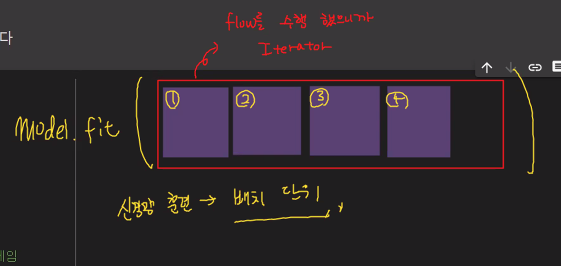

원래는 next로 하나하나꺼내지만 shuffle하면 랜덤으로 3 2 4 1순같이 꺼내서훈련. 이문제풀고 저문제풀고 하는느낌

# 검증용, 테스트용 generator만들기
- valid, test데이터셋은 rescale만 적용한다! 평가만 하기위한 set이므로

In [39]:
valid_gen = ImageDataGenerator(
    rescale = 1 / 255.0 # rescale만해주기
)

valid_flow_gen = valid_gen.flow_from_dataframe(
    dataframe=df_valid,
    x_col = 'path',
    y_col = 'label',
    target_size=(224,224),
    class_mode = 'categorical',
    batch_size=64,

    shuffle=False # 수능문제를 왜섞어
)

Found 1201 validated image filenames belonging to 2 classes.


# 전이학습을 이용한 모델링
- keras에서 이미 논문을 구현한 모델들이 있다.
- 모델들을 불러와서 우리 비즈니스에 맞게 커스터마이징
  - 비즈니스 : Downstream Task
  - 전이학습  모델을 이용해서 커스터마이징 하는 것을 파인튜닝(미세조정)

빨간부분은 이미 학습된모델.
주황색은 커스터마이징한부분 = downstream task

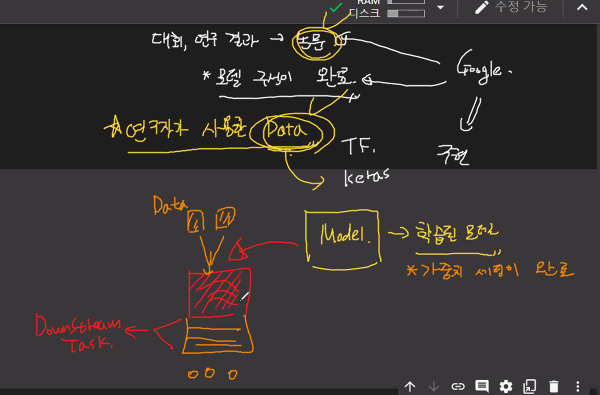

전교꼴등이 전교1등뇌 가져오는거

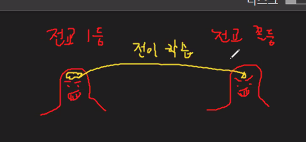

뇌를바꿔서 학습하는거 = 전이학습

In [40]:
from tensorflow.keras.models import Model

# 다운스트림 태스크 (커스터마이징된 비지니스 작업)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

# 전교1등의 뇌 가져오기(이미 학습다 완료된 모델)
from tensorflow.keras.applications import ResNet50V2 # 레지넷써야징

전교1등의 모델에서 feature extraction을 가져오겠음(여기서 사용했던 가중치를 띠어온다)

fully connected layer부분은 우리가 커스터마이징 = downstream task하면됨

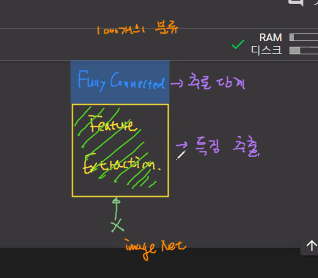

In [43]:
input = Input(shape=(224,224,3))

# 전이학습

# 1. 이미 훈련이 완료된 모델 가져오기
base_model = ResNet50V2(input_tensor=input, include_top=False, weights = 'imagenet') 
                                            # include_top = FCL부분말하는거임 위에서 파란박스
                                                              # imagenet대회에서 사용한 ResNet모델을 사용하겠다.


# 2. base_model.summary() 해서보면 마지막 output feature map의 결과를 가져와야함.
bm_output = base_model.output
# bm_output.shape (7,7,2048) 우리가 아까 만든거다!



# 3. 커스터마이징(downstream task수행)
x = GlobalAveragePooling2D()(bm_output)

# 이젠내맘대로 ㅎ
output = Dense(2, activation='softmax')(x)

model = Model(inputs=input, outputs= output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [44]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

model.fit(
    train_flow_gen,
    validation_data=valid_flow_gen,
    epochs=10)

Epoch 1/10
  5/107 [>.............................] - ETA: 1:05:57 - loss: 0.5361 - acc: 0.7937

KeyboardInterrupt: ignored